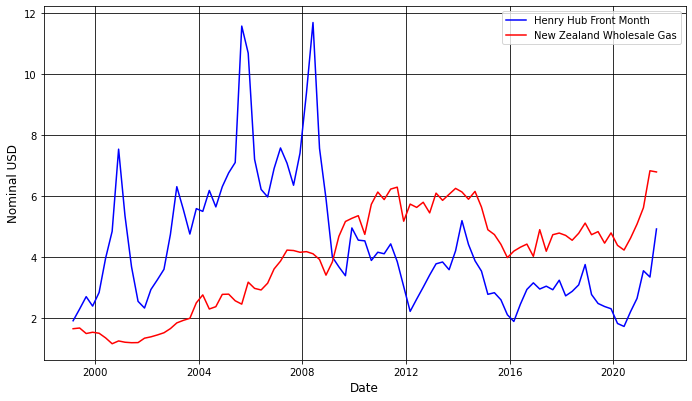

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as ts

### STARGAZER ###

from stargazer.stargazer import Stargazer, LineLocation

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/data/df_nzgas.csv'
df = pd.read_csv(url)
df["DATE"] = pd.to_datetime(df["DATE"],dayfirst=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col],errors='coerce')

df2 = df[(df['DATE'] >= '2009-3-1') & (df['DATE'] <= '2022-6-10')]

df3 = df[(df['DATE'] < '2009-3-1')]

fig = plt.gcf()
fig.set_size_inches(11.5, 6.5)
plt.plot(df['DATE'],df['HH'],color='blue')
plt.plot(df['DATE'],df['NZBTU_USD'],color='red')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Nominal USD', fontsize=12)
plt.legend(["Henry Hub Front Month", "New Zealand Wholesale Gas"], loc ="upper right")
plt.grid(color="black")

plt.savefig('/Users/joe/Dropbox/PhD/Writing/TeX/Charts/}nz-us-gas.png', dpi=400)

In [ ]:
result1 = smf.ols(formula="NZBTU_USD ~ HH", data=df).fit()
print(result1.summary())
plt.plot(result1.resid)

In [ ]:
test = ts.adfuller(result1.resid,autolag="AIC")
print(test)

result = ts.coint(df['HH'],df['NZBTU_USD'])
print(result)

In [ ]:
test1 = ts.adfuller(df2['HH'],autolag="AIC")
print(test1)
test2 = ts.adfuller(df2['NZBTU_USD'],autolag="AIC")
print(test2)


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(df2['DATE'],df2['HH'],color='blue')
plt.plot(df2['DATE'],df2['NZBTU_USD'],color='red')
plt.grid(color="black")

In [ ]:
result2 = smf.ols(formula="NZBTU_USD ~ HH", data=df2).fit()
print(result2.summary())
plt.plot(df2["DATE"],result2.resid)


test = ts.adfuller(result2.resid,autolag="AIC")
print(test)

result = ts.coint(df2['HH'],df2['NZBTU_USD'])
print(result)

In [ ]:
result_switch = smf.ols(formula="HH ~ NZBTU_USD", data=df2).fit()
print(result_switch.summary())
plt.plot(df2["DATE"],result_switch.resid)

test = ts.adfuller(result.resid,autolag="AIC")
print(test)

In [ ]:
test1 = ts.adfuller(df3['HH'],autolag="AIC")
print(test1)
test2 = ts.adfuller(df3['NZBTU_USD'],autolag="AIC")
print(test2)


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(df3['DATE'],df3['HH'],color='blue')
plt.plot(df3['DATE'],df3['NZBTU_USD'],color='red')
plt.grid(color="black")

In [ ]:
result3 = smf.ols(formula="NZBTU_USD ~ HH", data=df3).fit()
print(result3.summary())
plt.plot(df3["DATE"],result3.resid)

test = ts.adfuller(result3.resid,autolag="AIC")
print(test)

In [ ]:
df['ratio'] = df["HH"]/df["NZBTU_USD"]
plt.plot(df['DATE'],df['ratio'],color='blue')

In [ ]:
mod = sm.tsa.MarkovRegression(df['ratio'].iloc[1:], k_regimes=2, order=1, switching_variance=True)
res_mod = mod.fit()
res_mod.summary()

In [ ]:
res_mod.filtered_marginal_probabilities[1].plot(
    title='Probability of being in high price/volatility regime', figsize=(12,2))

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10.5, 8)
plt.plot(df['DATE'],df['NZ_BTU'],color='green')
fig.suptitle('Quarterly New Zealand Natural Gas Prices',fontsize=18)
plt.xlabel('Date', fontsize=12)
plt.ylabel('NZD/BTU', fontsize=12)
plt.grid(color="black")

plt.savefig('C:/Users/User/Dropbox/PhD/Writing/TeX/Charts/nzbtu.png', dpi=400)

In [ ]:
star = Stargazer([result1,result2,result3])
print(star.render_latex())

In [2]:
fig = plt.gcf()
fig.set_size_inches(11.5, 6.5)
plt.plot(df['DATE'],df['NBP-USD'],color='blue')
plt.plot(df['DATE'],df['NZBTU_USD'],color='red')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Nominal USD', fontsize=12)
plt.legend(["NBP Front Month", "New Zealand Wholesale Gas"], loc ="upper right")
plt.grid(color="black")

plt.savefig('/Users/joe/Dropbox/PhD/Writing/TeX/Charts/}nz-us-gas.png', dpi=400)

KeyError: 'NBP-USD'

<Figure size 828x468 with 0 Axes>